# Homework 8: Dataset 2: Baggage claims

* Open your dataset up using pandas in a Jupyter notebook
* Do a .head() to get a feel for your data
* Write down 12 questions to ask your data, or 12 things to hunt for in the data
* Attempt to answer those ten questions using the magic of pandas
* Make three charts with your dataset
* Keep track of anything that was problematic - it can be non-standard country names, extra spaces in columns, trouble getting multiple colors in scatterplots, whatever you'd like.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df=pd.read_csv('baggageclaims_data.csv')

In [4]:
df.head()

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2015060222904,28-May-15,21-May-15,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,$0.00,Deny
1,2015082725115,21-Aug-15,1-Aug-15,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,$180.00,Settle
2,2015102326219,7-Oct-15,2-Oct-15,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,$60.00,Approve in Full
3,2015122027695,27-Oct-15,19-Oct-15,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,22-Jan-15,23-Dec-14,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,$0.00,Deny


## 1) Which claim type is the most common?

In [5]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident D', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site',
       'Item Category', 'Close Amount', 'Disposition'],
      dtype='object')

In [6]:
df['Claim Type'].value_counts()
#Passenger Property Loss is most common claim type

Passenger Property Loss    4551
Property Damage            3888
Personal Injury             122
Motor Vehicle                35
-                            34
Complaint                    28
Employee Loss (MPCECA)        9
Name: Claim Type, dtype: int64

## 2. How do airlines compare on this most common claim type?

In [92]:
loss = df[df['Claim Type'] == 'Passenger Property Loss']
loss['Claim Type'].value_counts()

Passenger Property Loss    4551
Name: Claim Type, dtype: int64

In [62]:
loss_by_airline = loss.groupby('Airline Name')['Claim Type'].value_counts()
loss_by_airline.sort_values().tail(20)

Airline Name            Claim Type             
Turkish Airlines        Passenger Property Loss     12
Etihad Airways          Passenger Property Loss     17
Emirates                Passenger Property Loss     21
Westjet Airlines Ltd    Passenger Property Loss     26
Lufthansa               Passenger Property Loss     27
Air Canada              Passenger Property Loss     29
Virgin America          Passenger Property Loss     43
Allegiant Air           Passenger Property Loss     51
Hawaiian Airlines       Passenger Property Loss     70
Spirit Airlines         Passenger Property Loss     80
British Airways         Passenger Property Loss     87
Frontier Airlines       Passenger Property Loss     94
Alaska Airlines         Passenger Property Loss    203
Jet Blue                Passenger Property Loss    223
-                       Passenger Property Loss    225
USAir                   Passenger Property Loss    326
UAL                     Passenger Property Loss    578
American Airlines

In [183]:
loss_by_airline[loss_by_airline.sort_values().tail(20)].plt(kind='barh', xlim=(0,900), ylim=(0,900))

IndexError: index 203 is out of bounds for axis 1 with size 106

## 3. How does most common claimtype disperse over item categories?

In [91]:
loss_by_item = loss.groupby('Item Category')['Claim Type'].value_counts()
loss_by_item.sort_values().tail(20)

Item Category                         Claim Type             
Jewelry & Watches; Jewelry & Watches  Passenger Property Loss     39
Automobile Parts & Accessories        Passenger Property Loss     40
Tools & Home Improvement Supplies     Passenger Property Loss     47
Audio/Video                           Passenger Property Loss     54
Sporting Equipment & Supplies         Passenger Property Loss     71
Hunting & Fishing Items               Passenger Property Loss     77
Cameras                               Passenger Property Loss     83
Medical/Science                       Passenger Property Loss    100
Food & Drink                          Passenger Property Loss    111
Baggage/Cases/Purses                  Passenger Property Loss    122
Currency                              Passenger Property Loss    133
Personal Accessories                  Passenger Property Loss    149
Computer & Accessories                Passenger Property Loss    227
Cosmetics & Grooming                  Pas

## 4. Is there a correlation between the ten most lost items and when these get lost?

ValueError: First argument must be a sequence

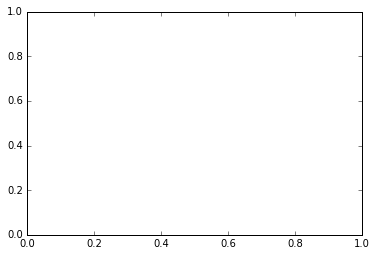

In [144]:
Clothing = df[df['Item Category'] == 'Clothing']
Jewelry = df[df['Item Category'] == 'Jewelry & Watches']
Travel_Accessories = df[df['Item Category'] == 'Travel Accessories']
Personal_Electronics = df[df['Item Category'] == 'Personal Electronics']
Cosmetics = df[df['Item Category'] == 'Cosmetics & Grooming']
Computer = df[df['Item Category'] == 'Computer & Accessories']

plt.scatter(y= Clothing["Date Received"], x= Clothing["Date Received"], c='c', alpha=0.75, marker='x')

plt.scatter(y= Jewelry["Date Received"], x= Jewelry["Date Received"], c='y', alpha=0.75, marker='o')

plt.scatter(y= Travel_Accessories["Date Received"], x= Travel_Accessories["Date Received"], c='m', alpha=0.75, marker='v')

plt.scatter(y= Personal_Electronics["Date Received"], x= Personal_Electronics["Date Received"], c='m', alpha=0.75, marker='s')

plt.scatter(y= Cosmetics["Date Received"], x= Cosmetics["Date Received"], c='m', alpha=0.75, marker='.')

plt.scatter(y= Computer["Date Received"], x= Computer["Date Received"], c='m', alpha=0.75, marker='*')

#markers: http://matplotlib.org/api/markers_api.html
# convert dates into actual dates for python
# make x a timeline: http://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib
# https://blog.mafr.de/2012/03/11/time-series-data-with-matplotlib/

## 5. What is the airport with most property damage?

In [93]:
damage = df[df['Claim Type'] == 'Property Damage']
damage['Claim Type'].value_counts()

Property Damage    3888
Name: Claim Type, dtype: int64

In [102]:
damage_by_airport = damage.groupby('Airport Name')['Claim Type'].value_counts()
damage_by_airport.sort_values().tail(30)

Airport Name                                      Claim Type     
John Wayne                                        Property Damage     33
Dallas Love Field                                 Property Damage     33
Metropolitan Oakland International                Property Damage     35
Honolulu International Airport                    Property Damage     36
Salt Lake City International Airport              Property Damage     37
New Orleans International                         Property Damage     37
Ronald Reagan Washington National Airport         Property Damage     39
Baltimore/Washington Intl Thurgood Marshall       Property Damage     47
Minneapolis/ St.Paul International Airport        Property Damage     47
Tampa International                               Property Damage     54
Charlotte/Douglas International Airport           Property Damage     59
San Diego International                           Property Damage     66
LaGuardia                                         Property

## 6. How many of the claims were granted, how many denied?

In [105]:
end = df['Disposition'].value_counts()
end

Deny               3574
-                  2066
Approve in Full    1958
Settle             1069
Name: Disposition, dtype: int64

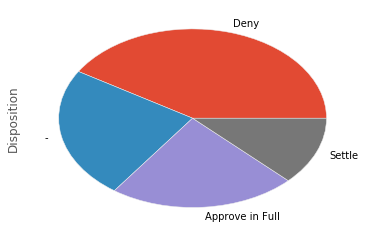

In [185]:
plt.style.use('ggplot')
end.plot(kind='pie')

## 7. How do airlines compare on denial and full approval of claims?

In [119]:
approval = df[df['Disposition'] == 'Approve in Full']
approval['Disposition'].value_counts()

Approve in Full    1958
Name: Disposition, dtype: int64

In [126]:
approval_by_airline = approval.groupby('Airline Name')['Disposition'].value_counts()
approval_by_airline.sort_values().tail(20)

Airline Name                Disposition    
Sun Country Airlines Inc    Approve in Full      4
Turkish Airlines            Approve in Full      4
Virgin Atlantic             Approve in Full      5
Air Canada                  Approve in Full      6
Virgin America              Approve in Full     13
Westjet Airlines Ltd        Approve in Full     14
Lufthansa                   Approve in Full     14
British Airways             Approve in Full     17
Hawaiian Airlines           Approve in Full     26
Allegiant Air               Approve in Full     27
Spirit Airlines             Approve in Full     35
Frontier Airlines           Approve in Full     37
Alaska Airlines             Approve in Full     77
Jet Blue                    Approve in Full     79
-                           Approve in Full    138
USAir                       Approve in Full    160
American Airlines           Approve in Full    250
UAL                         Approve in Full    252
Delta Air Lines             Approve in

In [132]:
denial = df[df['Disposition'] == 'Deny']
denial['Disposition'].value_counts()

Deny    3574
Name: Disposition, dtype: int64

In [137]:
denial_by_airline = denial.groupby('Airline Name')['Disposition'].value_counts()
denial_by_airline.sort_values().tail(20)

Airline Name            Disposition
Emirates                Deny             8
Etihad Airways          Deny             9
Lufthansa               Deny            13
Air France              Deny            13
Westjet Airlines Ltd    Deny            19
Air Canada              Deny            26
Virgin America          Deny            40
Allegiant Air           Deny            41
Hawaiian Airlines       Deny            60
Frontier Airlines       Deny            61
Spirit Airlines         Deny            72
British Airways         Deny            86
Alaska Airlines         Deny           145
-                       Deny           150
Jet Blue                Deny           161
USAir                   Deny           273
UAL                     Deny           459
American Airlines       Deny           496
Delta Air Lines         Deny           590
Southwest Airlines      Deny           658
Name: Disposition, dtype: int64

## 8. What is the average close amount? What is mean/max?

In [157]:
float_amount = df['Close Amount'].str.replace('$','').str.replace('-','0').str.replace(',','').astype(float)
df['Amount_float'] = float_amount
df.head(3)
df['Amount_float'].describe()

count    8667.000000
mean       70.513101
std       216.240594
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      5403.460000
Name: Amount_float, dtype: float64

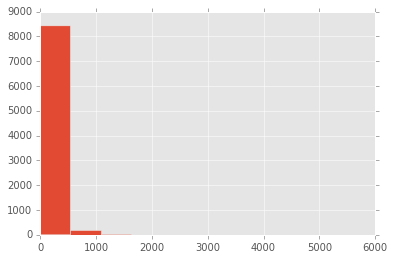

In [188]:
df['Amount_float'].hist()
#how to customize?

## 9. Per airline, what is the average close amount?

In [165]:
df.groupby('Airline Name')['Amount_float'].mean().sort_values().tail(50)

Airline Name
Allegiant Air                             63.900400
Delta Air Lines                           65.665711
Carribean Airlines                        66.104545
American Airlines                         66.141277
Royal Jordanian Airline                   66.750000
Emirates                                  67.813333
UAL                                       68.288594
Southwest Airlines                        68.696680
Air Canada                                69.911765
EVA airlines                              70.000000
Scandinavian Airlines Systems             70.535000
Island Air                                70.780000
Frontier Airlines                         70.792516
Spirit Airlines                           70.916341
Aero Flot                                 71.428571
USAir                                     72.987410
Pakistan International Airlines Cor       75.000000
OMNI Air Express- (OY)                    85.795000
Polish Airlines                           88.420000

In [191]:
#how to turn the above into a barh graph?
#df[df.groupby('Airline Name')['Amount_float']].mean().sort_values().tail(50)
#thought whether it was an issue of where the last ] is, but tried all positions... maybe it struggles with the two functions
# make it a new table first?

KeyError: <pandas.core.groupby.SeriesGroupBy object at 0x07834F30>

## 10. Per item category, what is the average close amount?

In [177]:
#loss['Amount_float'] = float_amount
#loss.groupby('Item Category')['Amount_float'].mean()
df.groupby('Item Category')['Amount_float'].mean()

#how to take only those with one entry? ie only "Audio/Video" instead of "Audio/Video; Audio/Video"?
#--> exclude all the cells that have a ; in it as that is how multiple entries are separated?

Item Category
-                                                                                                                                                                                                                   120.002443
Audio/Video                                                                                                                                                                                                          59.604272
Audio/Video; Audio/Video                                                                                                                                                                                              0.000000
Audio/Video; Audio/Video; Audio/Video                                                                                                                                                                                 0.000000
Audio/Video; Audio/Video; Baggage/Cases/Purses                                                